In [1]:
%matplotlib inline

# Retrieve cutout from hips2fits service

In [2]:
from astroquery.hips2fits import hips2fits
import matplotlib.pyplot as plt
plt.matplotlib.rcParams['figure.figsize'] = [25, 15]

from matplotlib.colors import Colormap
import astropy.units as u
from astropy.coordinates import Longitude, Latitude, Angle

hips = 'CDS/P/GALEXGR6/AIS/FUV'
hdu = hips2fits.query(
   hips=hips,
   width=2000,
   height=1000,
   ra=Longitude(35.19108333 * u.deg),
   dec=Latitude(-2.85677778 * u.deg),
   fov=Angle(5 * u.deg),
   projection="SIN",
   rotation_angle=90 * u.deg,
   get_query_payload=False,
   format='fits'
)  

image = hdu[0].data

# Display cutout image

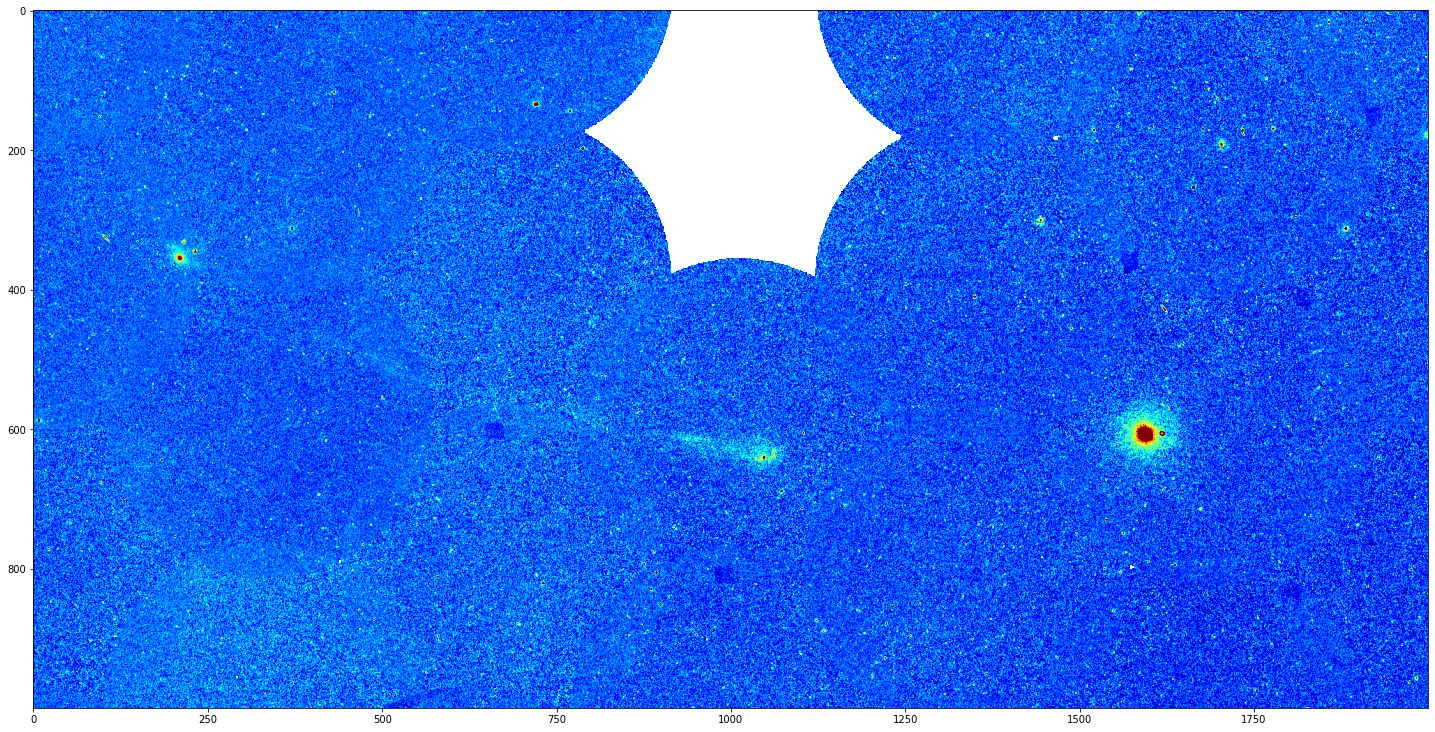

In [3]:
from astropy.visualization import (PercentileInterval, SqrtStretch, LogStretch,
                                   ImageNormalize)



norm = ImageNormalize(image, interval=PercentileInterval(99.9),
                      stretch=SqrtStretch())
initial_norm = norm
plt.imshow(image, cmap='jet', norm=norm)
plt.show()  

# Apply gaussian kernel

In [4]:
from astropy.convolution import convolve, Gaussian2DKernel, Tophat2DKernel

gauss_kernel = Gaussian2DKernel(10)
smoothed_image = convolve(image, gauss_kernel)

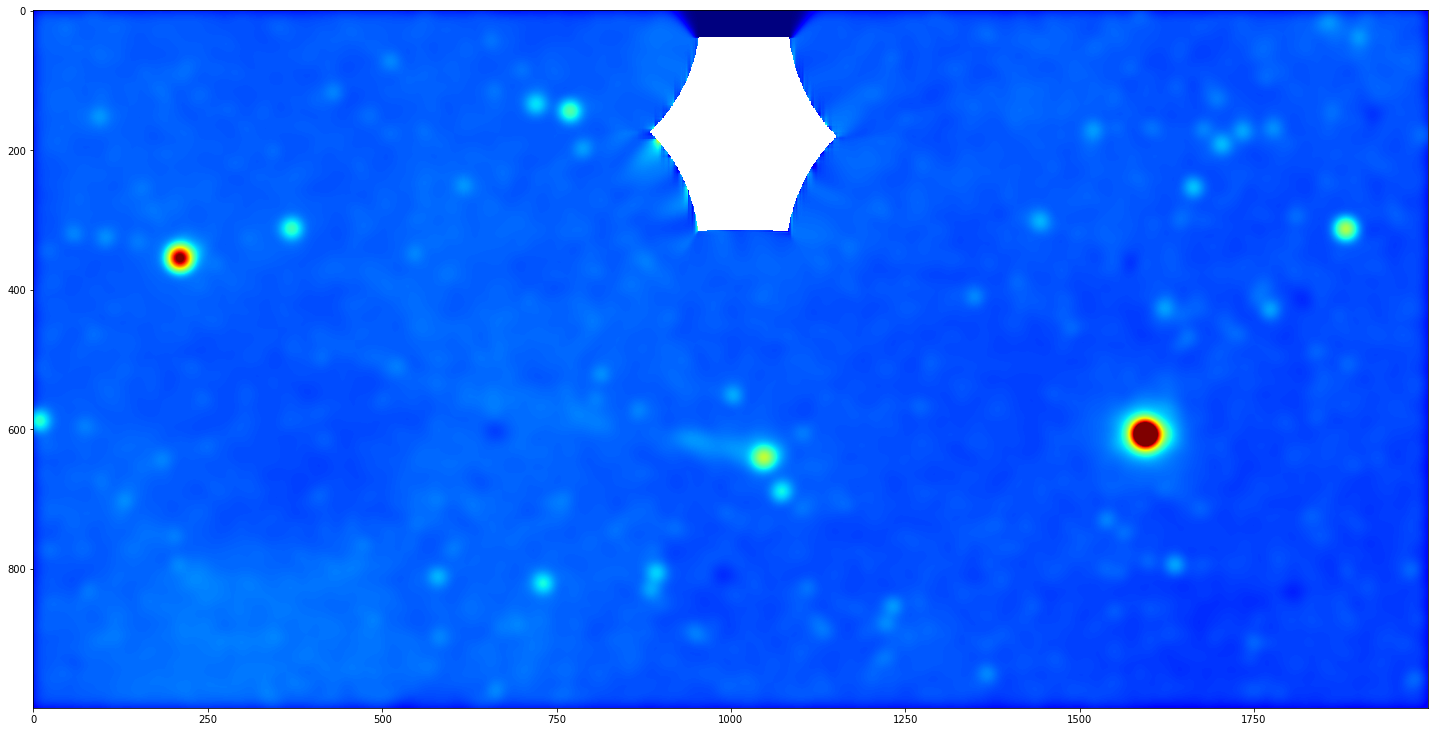

In [5]:
norm = ImageNormalize(smoothed_image, interval=PercentileInterval(99.9),
                      stretch=SqrtStretch())
plt.imshow(smoothed_image, cmap='jet', norm=norm)
plt.show() 

# visualize difference

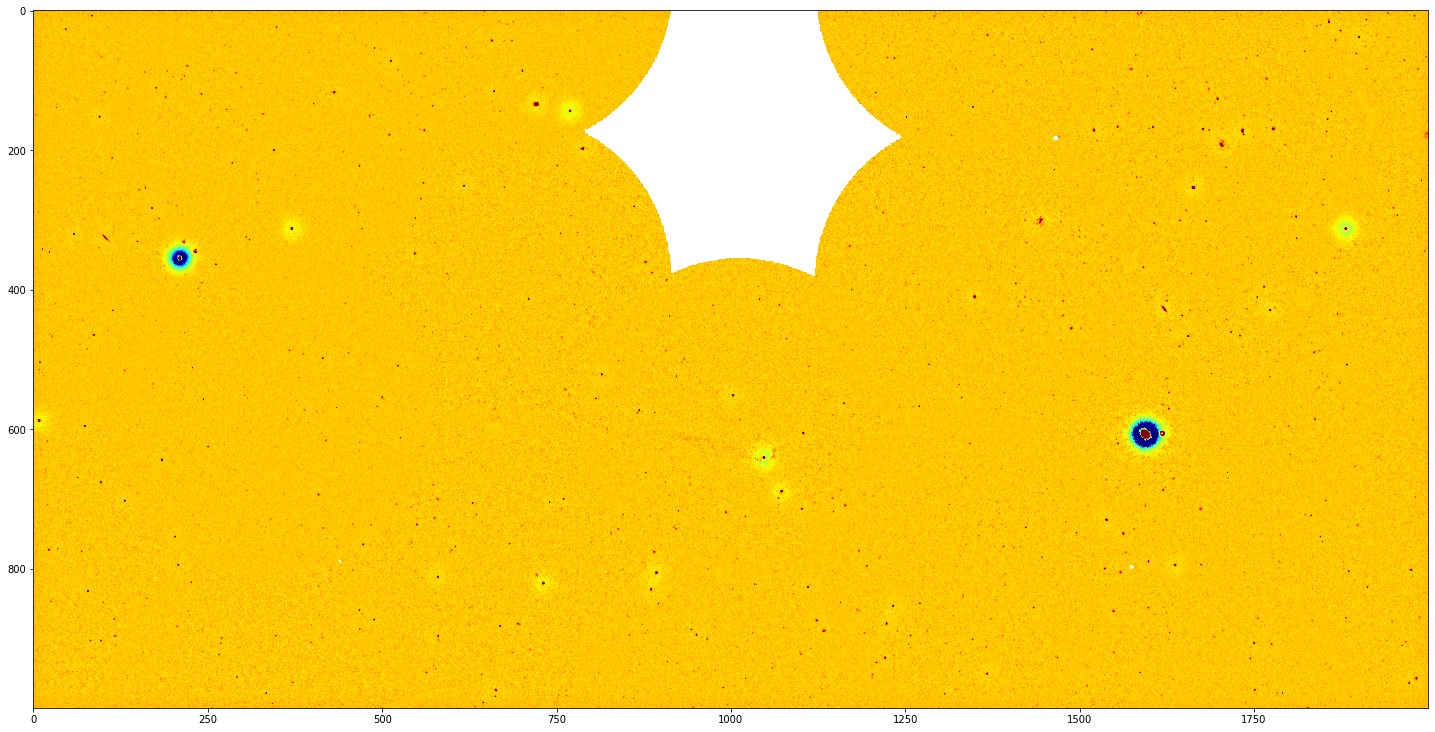

In [6]:
diff_image = image - smoothed_image

norm = ImageNormalize(diff_image, interval=PercentileInterval(99.9),
                      stretch=SqrtStretch())
plt.imshow(diff_image, cmap='jet', norm=norm)
plt.show()

# unsharp masking

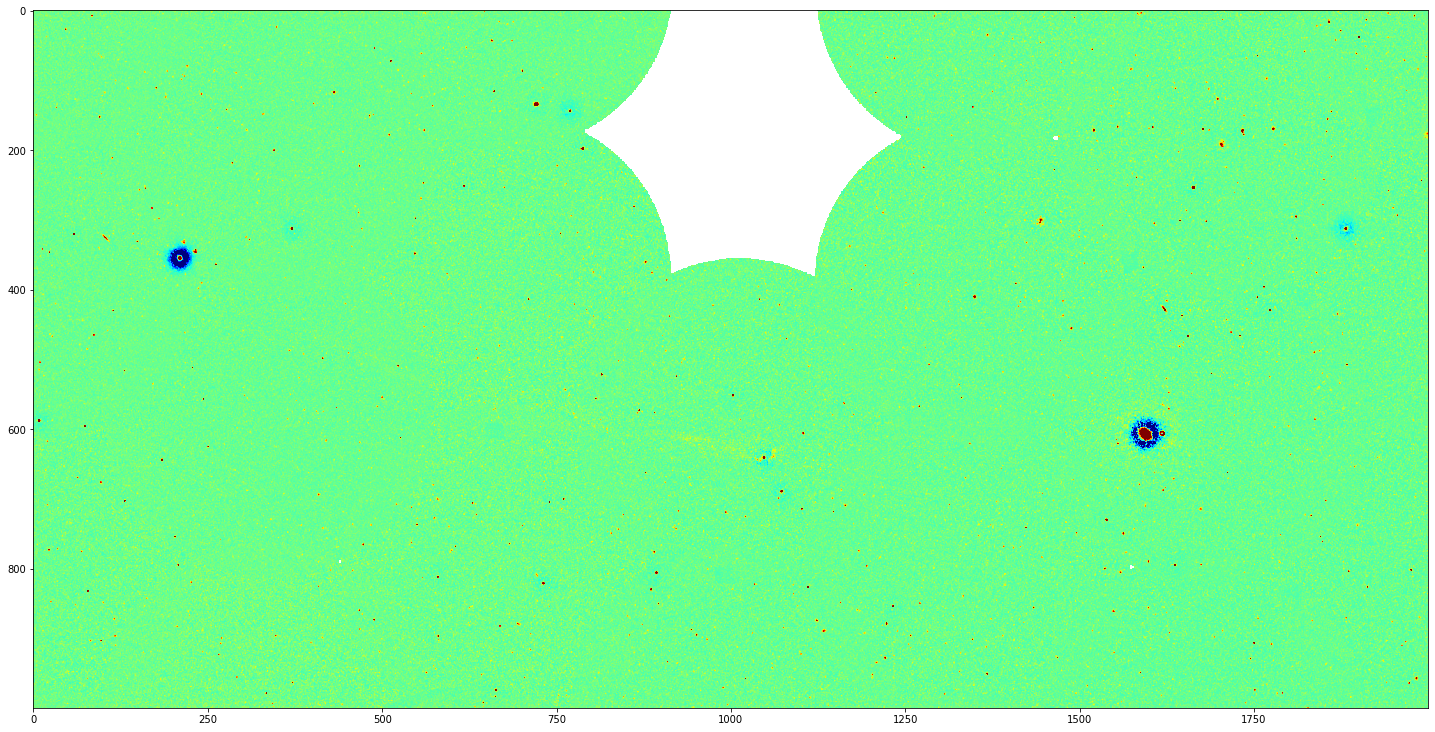

In [7]:
amount = 1.0
sharpened_image = image + (image - smoothed_image) * amount

norm = ImageNormalize(sharpened_image, interval=PercentileInterval(99.9),
                      stretch=SqrtStretch())
plt.imshow(sharpened_image, cmap='jet', norm=norm)
plt.show()